In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno
%matplotlib inline

## Load the data

In [2]:
file_path = r"D:\LIUZHICHENG\Udemy\Machine Learning\8 Real World Projects\Course Material\Project #1 Artificial Neural Networks - Car Sales Prediction\Car_Purchasing_Data.csv"
df = pd.read_csv(filepath_or_buffer=file_path, encoding='ISO-8859-1')
df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [3]:
df.isnull().sum()

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

## EDA

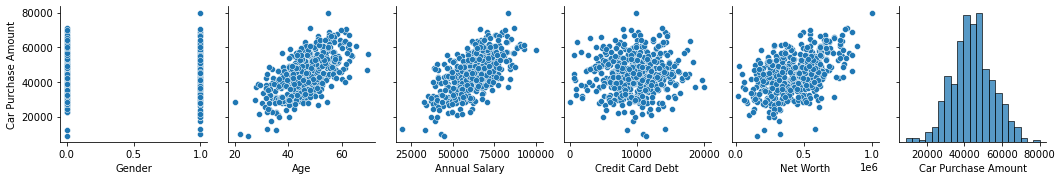

In [4]:
sns.pairplot(data=df, y_vars=["Car Purchase Amount"]);

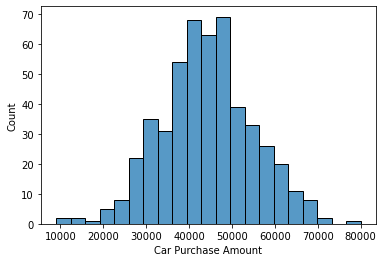

In [5]:
sns.histplot(data=df, x="Car Purchase Amount");

## Data Preprocessing

In [6]:
df.columns

Index(['Customer Name', 'Customer e-mail', 'Country', 'Gender', 'Age',
       'Annual Salary', 'Credit Card Debt', 'Net Worth',
       'Car Purchase Amount'],
      dtype='object')

In [7]:
# Drop "Customer Name", "Customer e-mail", "Country"
df = df.drop(columns=["Customer Name", "Customer e-mail", "Country"])

# pd.get_dummy for "Gender"
df = pd.get_dummies(data=df, columns=["Gender"], drop_first=True)

In [8]:
X = df.drop(columns=["Car Purchase Amount"])
y = df["Car Purchase Amount"]

###### tts

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True) # stratify=y

# Model Training (Linear Regression, no need feature scaling)

In [10]:
from sklearn.linear_model import LinearRegression

reg_lr = LinearRegression()
reg_lr.fit(X_train, y_train)

LinearRegression()

In [11]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score

predictions = reg_lr.predict(X_test)

print(f"r2_score: {r2_score(y_test, predictions)}")
print(f"mean_absolute_error: {mean_absolute_error(y_test, predictions)}")
print(f"mean_squared_error: {mean_squared_error(y_test, predictions)}")
print(f"Root mean_squared_error: {np.sqrt(mean_squared_error(y_test, predictions))}")
print(f"explained_variance_score: {explained_variance_score(y_test, predictions)}")

r2_score: 0.999999979272406
mean_absolute_error: 1.2338635968766176
mean_squared_error: 2.4965022014915643
Root mean_squared_error: 1.5800323419131534
explained_variance_score: 0.9999999796922973


# Model Training (ANN)

## Feature Scaling (Must for ANN)

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
X = df.drop(columns=["Car Purchase Amount"])
y = df["Car Purchase Amount"]

from sklearn.model_selection import train_test_split

# stratify= -> classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.preprocessing import MinMaxScaler, StandardScaler

sc = MinMaxScaler()
X_train[["Age", "Annual Salary", 
         "Credit Card Debt", "Net Worth"]] = sc.fit_transform(X=X_train[["Age", "Annual Salary", "Credit Card Debt", 
                                                                         "Net Worth"]])

X_test[["Age", "Annual Salary", 
        "Credit Card Debt", "Net Worth"]] = sc.transform(X=X_test[["Age", "Annual Salary", "Credit Card Debt", 
                                                                   "Net Worth"]])

In [14]:
sc.data_max_

array([7.00000000e+01, 1.00000000e+05, 1.86931465e+04, 1.00000000e+06])

In [15]:
sc.data_min_

array([   20., 20000.,   100., 20000.])

In [16]:
# You don't have to scale your target variable

# y_train = sc.fit_transform(y_train.to_numpy().reshape(-1, 1))
# y_test = sc.transform(y_test.to_numpy().reshape(-1, 1))

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# initiate a modle
model = Sequential()

# you can change number of neuron, units
model.add(layer=Dense(units = 25, input_dim=5, activation="relu"))
model.add(layer=Dense(units = 25, activation="relu"))

model.add(layer=Dense(units = 1, activation="linear")) # last layer

model.compile(optimizer="adam", loss="mse") # minimize mse, mean squared error

In [18]:
# 5 inputs, 25 units, 5 * 25 + 25 (biases) = 150 parameters
# previous 25 units * current 25 units + 25 (biases) = 650 parameters
# previous 25 unit * current 1 unit + 1 (bias) = 26
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                150       
_________________________________________________________________
dense_1 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 26        
Total params: 826
Trainable params: 826
Non-trainable params: 0
_________________________________________________________________


In [19]:
epochs_hist = model.fit(X_train, y_train, batch_size=25, epochs=1000, verbose=1, validation_split=0.2,
        #           validation_data=(X_test, y_test)
                 );

Epoch 1/1000
13/13 [==============================] - 0s 12ms/step - loss: 2028889344.0000 - val_loss: 2161065216.0000
Epoch 2/1000
13/13 [==============================] - 0s 2ms/step - loss: 2028866304.0000 - val_loss: 2161038336.0000
Epoch 3/1000
13/13 [==============================] - 0s 2ms/step - loss: 2028838272.0000 - val_loss: 2161004544.0000
Epoch 4/1000
13/13 [==============================] - 0s 2ms/step - loss: 2028801024.0000 - val_loss: 2160956928.0000
Epoch 5/1000
13/13 [==============================] - 0s 3ms/step - loss: 2028748032.0000 - val_loss: 2160888064.0000
Epoch 6/1000
13/13 [==============================] - 0s 2ms/step - loss: 2028670720.0000 - val_loss: 2160788736.0000
Epoch 7/1000
13/13 [==============================] - 0s 2ms/step - loss: 2028557056.0000 - val_loss: 2160647424.0000
Epoch 8/1000
13/13 [==============================] - 0s 2ms/step - loss: 2028396800.0000 - val_loss: 2160448000.0000
Epoch 9/1000
13/13 [==============================] - 0

Epoch 70/1000
13/13 [==============================] - 0s 2ms/step - loss: 1591790976.0000 - val_loss: 1705669632.0000
Epoch 71/1000
13/13 [==============================] - 0s 2ms/step - loss: 1575340672.0000 - val_loss: 1688631552.0000
Epoch 72/1000
13/13 [==============================] - 0s 2ms/step - loss: 1558467584.0000 - val_loss: 1671426304.0000
Epoch 73/1000
13/13 [==============================] - 0s 3ms/step - loss: 1541635840.0000 - val_loss: 1653723648.0000
Epoch 74/1000
13/13 [==============================] - 0s 3ms/step - loss: 1524316928.0000 - val_loss: 1635854464.0000
Epoch 75/1000
13/13 [==============================] - 0s 3ms/step - loss: 1506813568.0000 - val_loss: 1617725312.0000
Epoch 76/1000
13/13 [==============================] - 0s 2ms/step - loss: 1488907008.0000 - val_loss: 1599507712.0000
Epoch 77/1000
13/13 [==============================] - 0s 1ms/step - loss: 1471166720.0000 - val_loss: 1580737664.0000
Epoch 78/1000
13/13 [===========================

Epoch 139/1000
13/13 [==============================] - 0s 2ms/step - loss: 343894336.0000 - val_loss: 398392288.0000
Epoch 140/1000
13/13 [==============================] - 0s 2ms/step - loss: 332496384.0000 - val_loss: 385715072.0000
Epoch 141/1000
13/13 [==============================] - 0s 2ms/step - loss: 321216704.0000 - val_loss: 373461856.0000
Epoch 142/1000
13/13 [==============================] - 0s 2ms/step - loss: 310393792.0000 - val_loss: 361479360.0000
Epoch 143/1000
13/13 [==============================] - 0s 2ms/step - loss: 299927776.0000 - val_loss: 349778624.0000
Epoch 144/1000
13/13 [==============================] - 0s 2ms/step - loss: 289683616.0000 - val_loss: 338470624.0000
Epoch 145/1000
13/13 [==============================] - 0s 2ms/step - loss: 279901888.0000 - val_loss: 327445184.0000
Epoch 146/1000
13/13 [==============================] - 0s 2ms/step - loss: 270556512.0000 - val_loss: 316570368.0000
Epoch 147/1000
13/13 [==============================] - 

13/13 [==============================] - 0s 2ms/step - loss: 71305040.0000 - val_loss: 69278752.0000
Epoch 279/1000
13/13 [==============================] - 0s 2ms/step - loss: 71112832.0000 - val_loss: 69040216.0000
Epoch 280/1000
13/13 [==============================] - 0s 3ms/step - loss: 70902216.0000 - val_loss: 68857128.0000
Epoch 281/1000
13/13 [==============================] - 0s 2ms/step - loss: 70698456.0000 - val_loss: 68679520.0000
Epoch 282/1000
13/13 [==============================] - 0s 2ms/step - loss: 70503824.0000 - val_loss: 68529392.0000
Epoch 283/1000
13/13 [==============================] - 0s 2ms/step - loss: 70300944.0000 - val_loss: 68320568.0000
Epoch 284/1000
13/13 [==============================] - 0s 2ms/step - loss: 70102120.0000 - val_loss: 68101360.0000
Epoch 285/1000
13/13 [==============================] - 0s 2ms/step - loss: 69914160.0000 - val_loss: 68002328.0000
Epoch 286/1000
13/13 [==============================] - 0s 2ms/step - loss: 69713400.00

13/13 [==============================] - 0s 2ms/step - loss: 47403360.0000 - val_loss: 47773948.0000
Epoch 419/1000
13/13 [==============================] - 0s 2ms/step - loss: 47247672.0000 - val_loss: 47640028.0000
Epoch 420/1000
13/13 [==============================] - 0s 2ms/step - loss: 47112140.0000 - val_loss: 47471216.0000
Epoch 421/1000
13/13 [==============================] - 0s 1ms/step - loss: 46974472.0000 - val_loss: 47390432.0000
Epoch 422/1000
13/13 [==============================] - 0s 2ms/step - loss: 46841388.0000 - val_loss: 47277524.0000
Epoch 423/1000
13/13 [==============================] - 0s 2ms/step - loss: 46701824.0000 - val_loss: 47074452.0000
Epoch 424/1000
13/13 [==============================] - 0s 2ms/step - loss: 46561540.0000 - val_loss: 46970504.0000
Epoch 425/1000
13/13 [==============================] - 0s 1ms/step - loss: 46428280.0000 - val_loss: 46868184.0000
Epoch 426/1000
13/13 [==============================] - 0s 2ms/step - loss: 46296224.00

13/13 [==============================] - 0s 2ms/step - loss: 31659540.0000 - val_loss: 34238956.0000
Epoch 559/1000
13/13 [==============================] - 0s 2ms/step - loss: 31580660.0000 - val_loss: 34143636.0000
Epoch 560/1000
13/13 [==============================] - 0s 3ms/step - loss: 31487030.0000 - val_loss: 34062244.0000
Epoch 561/1000
13/13 [==============================] - 0s 2ms/step - loss: 31403892.0000 - val_loss: 33936372.0000
Epoch 562/1000
13/13 [==============================] - 0s 1ms/step - loss: 31318454.0000 - val_loss: 33922344.0000
Epoch 563/1000
13/13 [==============================] - 0s 3ms/step - loss: 31228806.0000 - val_loss: 33813060.0000
Epoch 564/1000
13/13 [==============================] - 0s 2ms/step - loss: 31148192.0000 - val_loss: 33757592.0000
Epoch 565/1000
13/13 [==============================] - 0s 2ms/step - loss: 31049114.0000 - val_loss: 33650756.0000
Epoch 566/1000
13/13 [==============================] - 0s 2ms/step - loss: 30974902.00

13/13 [==============================] - 0s 3ms/step - loss: 21228700.0000 - val_loss: 24165388.0000
Epoch 699/1000
13/13 [==============================] - 0s 2ms/step - loss: 21135686.0000 - val_loss: 24144412.0000
Epoch 700/1000
13/13 [==============================] - 0s 3ms/step - loss: 21088144.0000 - val_loss: 24104770.0000
Epoch 701/1000
13/13 [==============================] - 0s 2ms/step - loss: 21013296.0000 - val_loss: 23997590.0000
Epoch 702/1000
13/13 [==============================] - 0s 2ms/step - loss: 20944750.0000 - val_loss: 23955192.0000
Epoch 703/1000
13/13 [==============================] - 0s 2ms/step - loss: 20889476.0000 - val_loss: 23871456.0000
Epoch 704/1000
13/13 [==============================] - 0s 2ms/step - loss: 20814214.0000 - val_loss: 23814478.0000
Epoch 705/1000
13/13 [==============================] - 0s 2ms/step - loss: 20756598.0000 - val_loss: 23807270.0000
Epoch 706/1000
13/13 [==============================] - 0s 2ms/step - loss: 20686172.00

Epoch 769/1000
13/13 [==============================] - 0s 2ms/step - loss: 16832836.0000 - val_loss: 19500312.0000
Epoch 770/1000
13/13 [==============================] - 0s 2ms/step - loss: 16774701.0000 - val_loss: 19487418.0000
Epoch 771/1000
13/13 [==============================] - 0s 2ms/step - loss: 16719067.0000 - val_loss: 19410728.0000
Epoch 772/1000
13/13 [==============================] - 0s 2ms/step - loss: 16659422.0000 - val_loss: 19339348.0000
Epoch 773/1000
13/13 [==============================] - 0s 2ms/step - loss: 16596437.0000 - val_loss: 19322320.0000
Epoch 774/1000
13/13 [==============================] - 0s 2ms/step - loss: 16544691.0000 - val_loss: 19239308.0000
Epoch 775/1000
13/13 [==============================] - 0s 2ms/step - loss: 16487117.0000 - val_loss: 19192596.0000
Epoch 776/1000
13/13 [==============================] - 0s 2ms/step - loss: 16433272.0000 - val_loss: 19149702.0000
Epoch 777/1000
13/13 [==============================] - 0s 2ms/step - lo

Epoch 910/1000
13/13 [==============================] - 0s 2ms/step - loss: 9746170.0000 - val_loss: 11604556.0000
Epoch 911/1000
13/13 [==============================] - 0s 2ms/step - loss: 9698592.0000 - val_loss: 11586818.0000
Epoch 912/1000
13/13 [==============================] - 0s 2ms/step - loss: 9666874.0000 - val_loss: 11572186.0000
Epoch 913/1000
13/13 [==============================] - 0s 2ms/step - loss: 9612888.0000 - val_loss: 11485742.0000
Epoch 914/1000
13/13 [==============================] - 0s 3ms/step - loss: 9576302.0000 - val_loss: 11423014.0000
Epoch 915/1000
13/13 [==============================] - 0s 2ms/step - loss: 9533566.0000 - val_loss: 11387374.0000
Epoch 916/1000
13/13 [==============================] - 0s 2ms/step - loss: 9488047.0000 - val_loss: 11310998.0000
Epoch 917/1000
13/13 [==============================] - 0s 2ms/step - loss: 9444622.0000 - val_loss: 11271370.0000
Epoch 918/1000
13/13 [==============================] - 0s 2ms/step - loss: 9408

13/13 [==============================] - 0s 2ms/step - loss: 6979569.0000 - val_loss: 8437161.0000
Epoch 982/1000
13/13 [==============================] - 0s 2ms/step - loss: 6943203.0000 - val_loss: 8406269.0000
Epoch 983/1000
13/13 [==============================] - 0s 2ms/step - loss: 6909641.5000 - val_loss: 8378780.0000
Epoch 984/1000
13/13 [==============================] - 0s 2ms/step - loss: 6875708.0000 - val_loss: 8345225.0000
Epoch 985/1000
13/13 [==============================] - 0s 2ms/step - loss: 6849209.0000 - val_loss: 8259589.5000
Epoch 986/1000
13/13 [==============================] - 0s 2ms/step - loss: 6803795.0000 - val_loss: 8237733.0000
Epoch 987/1000
13/13 [==============================] - 0s 2ms/step - loss: 6769501.0000 - val_loss: 8217386.5000
Epoch 988/1000
13/13 [==============================] - 0s 2ms/step - loss: 6736821.0000 - val_loss: 8173976.0000
Epoch 989/1000
13/13 [==============================] - 0s 2ms/step - loss: 6701350.5000 - val_loss: 81

## Evaluate the Model

In [20]:
type(epochs_hist)

tensorflow.python.keras.callbacks.History

In [21]:
epochs_hist.history

{'loss': [2028889344.0,
  2028866304.0,
  2028838272.0,
  2028801024.0,
  2028748032.0,
  2028670720.0,
  2028557056.0,
  2028396800.0,
  2028174336.0,
  2027883776.0,
  2027517952.0,
  2027063936.0,
  2026516096.0,
  2025864192.0,
  2025097984.0,
  2024211840.0,
  2023175808.0,
  2021990784.0,
  2020662656.0,
  2019139840.0,
  2017475584.0,
  2015621504.0,
  2013562240.0,
  2011303552.0,
  2008859904.0,
  2006168576.0,
  2003251584.0,
  2000084608.0,
  1996670336.0,
  1992943232.0,
  1989022336.0,
  1984786176.0,
  1980313216.0,
  1975548544.0,
  1970466048.0,
  1965148544.0,
  1959475584.0,
  1953518336.0,
  1947287552.0,
  1940718592.0,
  1933803904.0,
  1926629376.0,
  1919109376.0,
  1911296640.0,
  1903121408.0,
  1894627072.0,
  1885826048.0,
  1876626816.0,
  1867190912.0,
  1857280000.0,
  1847173376.0,
  1836680448.0,
  1825842432.0,
  1814675712.0,
  1803163392.0,
  1791259648.0,
  1779058048.0,
  1766617472.0,
  1753816064.0,
  1740564480.0,
  1727100672.0,
  1713254272.0,


In [22]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

In [23]:
pd.DataFrame(epochs_hist.history)

,loss,val_loss
0,2.028889e+09,2.161065e+09
1,2.028866e+09,2.161038e+09
2,2.028838e+09,2.161005e+09
3,2.028801e+09,2.160957e+09
4,2.028748e+09,2.160888e+09
...,...,...
995,6.473515e+06,7.843672e+06
996,6.430434e+06,7.799960e+06
997,6.397828e+06,7.772227e+06
998,6.367688e+06,7.709968e+06


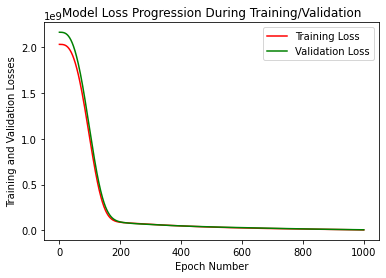

In [24]:
plt.plot(epochs_hist.history["loss"], color="red")
plt.plot(epochs_hist.history["val_loss"], color="green")
plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(["Training Loss", "Validation Loss"]);

In [25]:
model.evaluate(x=X_test, y=y_test, verbose=1)

4/4 [==============================] - 0s 997us/step - loss: 6220992.0000


6220992.0

In [26]:
loss_df = pd.DataFrame(data=model.history.history)
loss_df

""


In [27]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score

predictions = reg_lr.predict(X_test)

print(f"r2_score: {r2_score(y_test, predictions)}")
print(f"mean_absolute_error: {mean_absolute_error(y_test, predictions)}")
print(f"mean_squared_error: {mean_squared_error(y_test, predictions)}")
print(f"Root mean_squared_error: {np.sqrt(mean_squared_error(y_test, predictions))}")
print(f"explained_variance_score: {explained_variance_score(y_test, predictions)}")

r2_score: -62.16745727398091
mean_absolute_error: 86541.69322270589
mean_squared_error: 7608104256.578433
Root mean_squared_error: 87224.44758540139
explained_variance_score: 0.014976526948151658


## Predit a sample

In [28]:
sample = pd.DataFrame(data={'Age': 50, 'Annual Salary': 50_000, 'Credit Card Debt': 10_000, 
                            'Net Worth': 600_000, 'Gender_1': 1}, index=[0])

In [29]:
sample

,Age,Annual Salary,Credit Card Debt,Net Worth,Gender_1
0,50,50000,10000,600000,1


###### fs

In [30]:
sample[["Age", "Annual Salary", 
         "Credit Card Debt", "Net Worth"]] = sc.transform(X=sample[["Age", "Annual Salary", "Credit Card Debt", 
                                                                         "Net Worth"]])


In [31]:
sample

,Age,Annual Salary,Credit Card Debt,Net Worth,Gender_1
0,0.6,0.375,0.532454,0.591837,1


In [32]:
model.predict(sample)

array([[45607.53]], dtype=float32)

In [33]:
# sample.melt(id_vars="Annual Salary", var_name="Column Names", value_name="My Value")